FloatSlider(value=0.0, description='RH [%]:')

Button(description='Calculate', style=ButtonStyle())

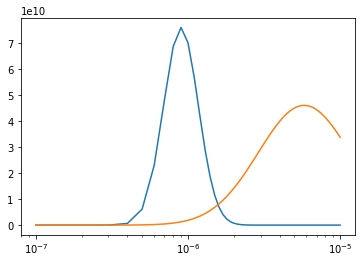

In [2]:
import ipywidgets as widgets
import numpy as np
from collections import namedtuple
from matplotlib import pyplot
from IPython.display import display
from PyPartMC import si

humidity_widget = widgets.FloatSlider(description='RH [%]:', min=0, max=100)
display(humidity_widget)

mode_1_n_per_cc = widgets.IntSlider(min=0, max=100000, value=50000)
h11 = widgets.HBox([widgets.Label(value='Mode 1 Number [#/cc]:'), mode_1_n_per_cc])
 
mode_1_gsd = widgets.FloatSlider(min=1.1, max=5, value=1.3)
h12 = widgets.HBox([widgets.Label(value='Mode 1 Geometric Standard Deviation:'), mode_1_gsd])
 
mode_1_gm_microns = widgets.FloatSlider(min=0.001, max=10, value=0.9, readout_format='.3f')
h13 = widgets.HBox([widgets.Label(value='Mode 1 Geometric Mean [microns]:'), mode_1_gm_microns])

mode_2_n_per_cc = widgets.IntSlider(min=0, max=100000, value=80000)
h21 = widgets.HBox([widgets.Label(value='Mode 2 Number [#/cc]:'), mode_2_n_per_cc])

mode_2_gsd = widgets.FloatSlider(min=1.1, max=5, value=2)
h22 = widgets.HBox([widgets.Label(value='Mode 2 Geometric Standard Deviation:'), mode_2_gsd])

mode_2_gm_microns = widgets.FloatSlider(min=0.001, max=10, value=5.8, readout_format='.3f')
h23 = widgets.HBox([widgets.Label(value='Mode 2 Geometric Mean [microns]:'), mode_2_gm_microns])

v1 = widgets.VBox([h11, h12, h13])
v2 = widgets.VBox([h21, h22, h23])

button = widgets.Button(description='Calculate')

def ln_norm():
    Mode = namedtuple("Mode", ("norm_factor", "geom_mean", "geom_stdev"))
    modes = (
        Mode(norm_factor=mode_1_n_per_cc.value/si.cm**3, geom_mean=mode_1_gm_microns.value*si.um, geom_stdev=mode_1_gsd.value),
        Mode(norm_factor=mode_2_n_per_cc.value/si.cm**3, geom_mean=mode_2_gm_microns.value*si.um, geom_stdev=mode_2_gsd.value)
    )
    
    x = np.linspace(0.1*si.um,10*si.um, 100)

    lognormal = lambda x, num, gm, gsd: x * ((num / (np.sqrt(2*np.pi)*x*np.log(gsd))) * \
         np.exp(-(np.log(x) - np.log(gm))** 2 / (2*np.log(gsd)** 2)))
    
    fig = pyplot.figure()
    
    fig.add_subplot(xscale='log')
    
    pyplot.plot(x, lognormal(x, *modes[0]))
    pyplot.plot(x, lognormal(x, *modes[1]))
    pyplot.show()

def on_button_clicked(_):
    ln_norm()

V = widgets.VBox([v1, v2])
display(V)
display(button)

button.on_click(on_button_clicked)